### Template Matching in Computer Vision

Template matching is a classical computer vision technique used to locate a specific pattern or object within an image. This technique involves sliding a template image over the target image to find the regions where the template matches the target best. It's commonly used for object detection, image alignment, and image recognition tasks.

### Key Concepts and Steps

1. **Template Image**:
   - The template image is a smaller image or pattern that you want to find within a larger target image. This template can be a simple shape, character, or object.

2. **Sliding Window**:
   - The template is moved (slid) across the target image, and at each position, a similarity measure is computed between the template and the region of the target image currently under the template.

3. **Similarity Measures**:
   - Several methods can be used to calculate the similarity between the template and the target image region:
     - **Normalized Cross-Correlation (NCC)**: Measures how well the template matches the image region. High values indicate a good match.
     - **Sum of Squared Differences (SSD)**: Measures the sum of squared differences between the template and the image region.
     - **Sum of Absolute Differences (SAD)**: Measures the sum of absolute differences between the template and the image region.
     - **Correlation Coefficient**: Measures the correlation between the template and the image region.

4. **Finding the Best Match**:
   - After computing similarity scores for all positions, the location with the highest (or lowest, depending on the method) similarity score is considered the best match.

5. **Draw Bounding Box**:
   - A bounding box can be drawn around the detected template location in the target image to visualize the match.


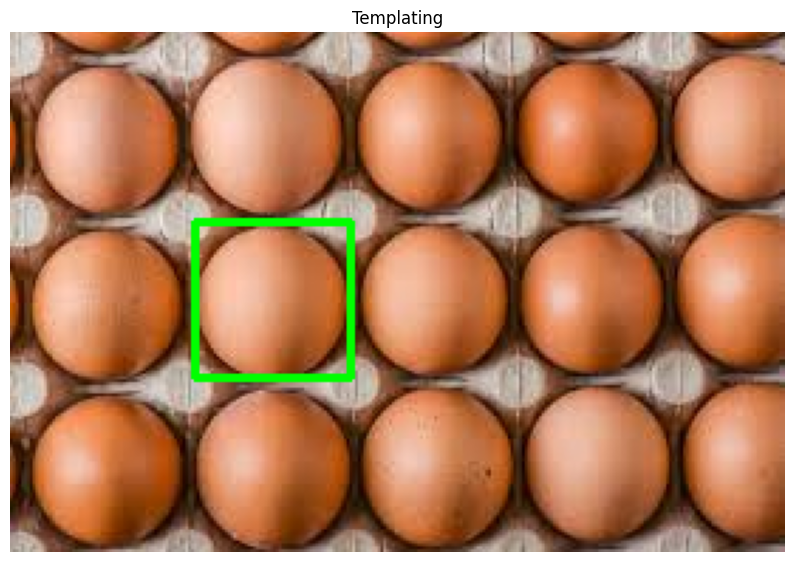

In [24]:
import cv2
import numpy as np

# Load the target image and the template image
target_image = cv2.imread('image/main.jpeg')
template_image = cv2.imread('image/sub.jpeg')

# Convert images to grayscale
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(target_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the detected template
template_height, template_width = template_gray.shape
top_left = max_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv2.rectangle(target_image, top_left, bottom_right, (0, 255, 0), 2)

# Display output
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.title('Templating')
plt.axis("off")
plt.show()

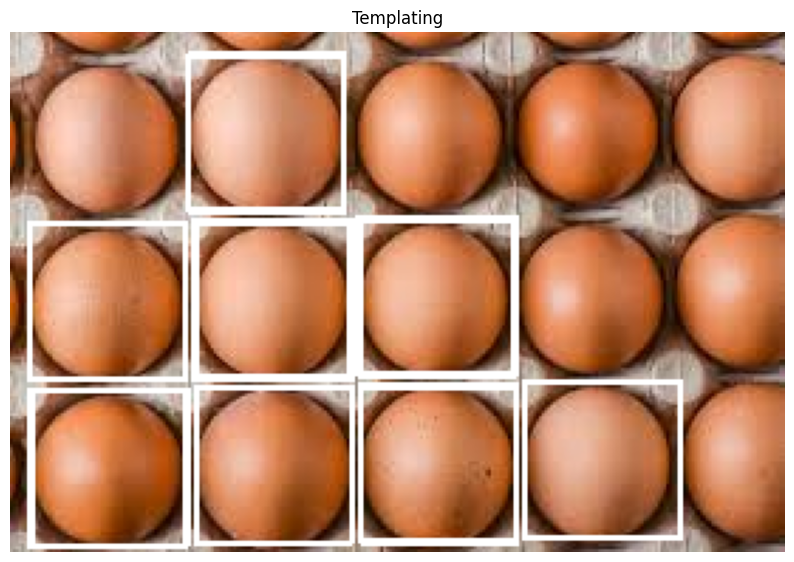

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Load the target image and the template image
target_image = cv2.imread('image/main.jpeg')
template_image = cv2.imread('image/sub.jpeg')

# Convert images to grayscale
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
w, h = template_gray.shape[::-1]

# Perform template matching
result = cv2.matchTemplate(target_gray, template_gray, cv2.TM_CCOEFF_NORMED)

threshold = 0.9
loc = np.where( result >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(target_image, pt, (pt[0] + w, pt[1] + h), (255,255,255), 1)
 
# Display output
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.title('Templating')
plt.axis("off")
plt.show()

### Key Points

1. **Template Size**:
   - The size of the template image is crucial. A template that's too small may not accurately capture the pattern, while a template that's too large might not fit the target image properly.

2. **Template Matching Methods**:
   - OpenCV provides several methods for template matching (`cv2.matchTemplate`), each suited to different types of images and templates. Choose the method that best suits your application.

3. **Scalability and Rotation**:
   - Basic template matching does not handle changes in scale or rotation of the template. For more robust solutions, additional preprocessing or advanced methods may be required.

4. **Performance**:
   - Template matching can be computationally intensive, especially with large images and templates. Optimizing the size and resolution of the images can help improve performance.

### Applications

- **Object Detection**: Locating objects in images, such as finding logos or specific patterns.
- **Image Alignment**: Aligning images by finding corresponding features.
- **Quality Control**: Detecting defects or deviations from the standard pattern in manufacturing.

Template matching is a straightforward and effective technique for many image recognition tasks, especially when the objects of interest have consistent appearances and sizes. For more complex scenarios involving variations in scale, rotation, or lighting, more advanced techniques may be necessary.